# ASTR 310 HW 7

### 1. Color-magnitude diagram (CMD) for Omega Cen

Download the file "ngc5139.dat" from the course web site. This is a text file containing positions and multi-band fluxes for 32,514 stars in the globular cluster Omega Centauri (NGC 5139) as published in [Bellini et al. 2010, AJ, 140, 631](https://ui.adsabs.harvard.edu/abs/2010AJ....140..631B/abstract). 
A copy of the paper is also available on the website for your convenience. Using NumPy, Astropy, and Matplotlib, write a program to do the following.


**a)** Read the data into your program using Astropy's `astropy.io.ascii` routine to produce a `Table` object. 
[5 pts]

In [98]:
import astropy.io.ascii
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [99]:
t = astropy.io.ascii.read("ngc5139.dat", guess=False, header_start=12, data_start=15, delimiter=" ")
t

Seq,RA,DE,F225W,F275W,F336W,F435W,F606W,F625W,F658N,F814W
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,201.7162676,-47.5126489,23.421,22.291,21.088,20.971,19.99,19.76,19.526,19.311
2,201.715687,-47.5123958,20.674,19.843,19.095,19.166,18.436,18.248,18.056,17.886
3,201.7142821,-47.5123325,21.045,20.156,19.368,19.426,18.65,18.468,18.271,18.092
4,201.7150112,-47.5122876,24.545,22.899,21.604,21.38,20.289,20.133,19.908,19.579
5,201.7138235,-47.5122802,23.926,22.485,21.13,21.04,20.033,19.801,19.578,19.333
6,201.7158384,-47.512243,21.261,20.377,19.555,19.596,18.831,18.625,18.421,18.248
7,201.7153042,-47.5121646,21.184,20.318,19.513,19.597,18.803,18.633,18.426,18.202
8,201.7150457,-47.5121237,21.843,20.905,20.033,20.095,19.282,19.092,18.866,18.681
9,201.7166455,-47.5121043,21.047,20.206,19.413,19.5,18.726,18.548,18.34,18.132


**b)** Use the table data to reproduce the lower right panel of Figure 2 in Bellini et al (the one showing the three main sequences). Label the main sequences as shown in the panel (MSa in green, rMS in red, bMS in blue).  Use the same axis limits as in that panel, and label the axes as done for the plot as a whole.  Note that the plot has an inverted $y$ axis with smaller values toward the top, since smaller magnitude values correspond to higher fluxes.  You can achieve that effect with a construction like `plt.ylim(5,3)`.

Your plot will not look exactly like the published version because the published one has gridded the data points into a 2D image whereas you are plotting individual dots.

This is a color-magnitude diagram, the observer's analog of a Hertzsprung-Russell diagram. [8 pts]

Text(0.5, 1.0, 'NGC 5139')

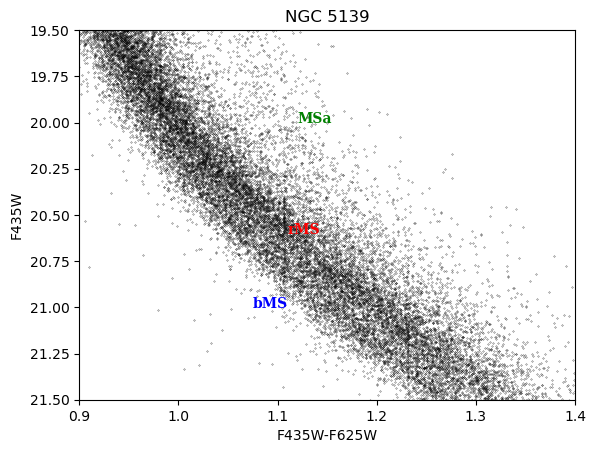

In [100]:
plt.scatter(x=t["F435W"]-t["F625W"],y=t["F435W"], s=0.05, c="k")
plt.xlim(0.9, 1.4)
plt.ylim(21.5, 19.5)
plt.text(01.12, 20, "MSa",fontdict={"color":"green", "family": "serif", "weight": "bold"})
plt.text(01.11, 20.6, "rMS",fontdict={"color":"red", "family": "serif", "weight": "bold"})
plt.text(01.075, 21, "bMS",fontdict={"color":"blue", "family": "serif", "weight": "bold"})
plt.xlabel("F435W-F625W")
plt.ylabel("F435W")
plt.title("NGC 5139")

**c)** Create two 2D unit vectors: one parallel to the line connecting the points (0.9, 20) and (1.3, 21.7) on the diagram, and the other perpendicular to the line and pointing toward the upper right.  We will call them ${\hat{\mathbf n}}_\parallel$  and ${\hat{\mathbf n}}_\perp$.  Check your math by verifying that ${\hat{\mathbf n}}_\parallel \cdot {\hat{\mathbf n}}_\perp = 0$ and both vectors have length 1.

If you like you can plot the unit vectors on your CMD, but be aware that they will probably not look perpendicular to each other because your plot probably has unequal scales on the x and y axes.

[8 pts]


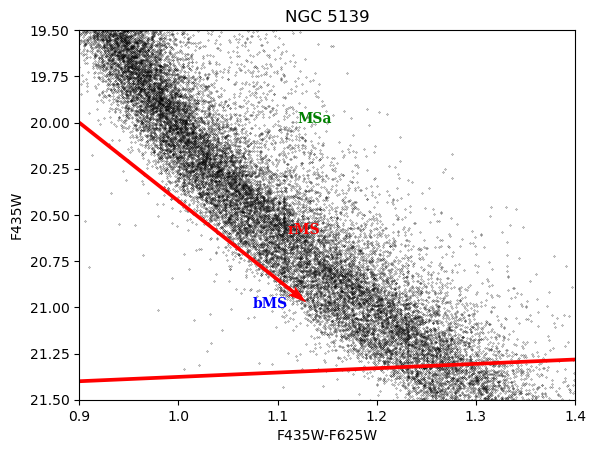

In [101]:
plt.scatter(x=t["F435W"]-t["F625W"],y=t["F435W"], s=0.05, c="k")
plt.xlim(0.9, 1.4)
plt.ylim(21.5, 19.5)
plt.text(01.12, 20, "MSa",fontdict={"color":"green", "family": "serif", "weight": "bold"})
plt.text(01.11, 20.6, "rMS",fontdict={"color":"red", "family": "serif", "weight": "bold"})
plt.text(01.075, 21, "bMS",fontdict={"color":"blue", "family": "serif", "weight": "bold"})
plt.xlabel("F435W-F625W")
plt.ylabel("F435W")
plt.title("NGC 5139")

n_par = np.array([0.4, 1.7])
n_par = n_par / np.linalg.norm(n_par)
n_per = np.array([1.7, -0.4])
n_per = n_per / np.linalg.norm(n_per)
plt.quiver(0.9, 20, n_par[0], n_par[1], angles='xy', scale_units='xy', scale=1, color='r')
plt.quiver(0.9, 21.4, n_per[0], n_per[1], angles='xy', scale_units='xy', scale=1, color='r')

In [102]:
np.dot(n_par, n_per)

-3.661148649106795e-18

In [103]:
np.linalg.norm(n_par)

1.0

In [104]:
np.linalg.norm(n_per)

1.0

In the next part you will calculate the dot product of each star's position vector with each of the two unit vectors. This effectively rotates the whole figure so that the line defined by the two points at the beginning becomes the new $x$ axis. The different main sequences will lie roughly parallel to it, ie. horizontally or vertically, and we will be able to create a histogram of the main sequences by binning in the new $x$ or $y$ coordinate.

What's the point of this analysis? It's to show how you might distinguish stars in the different main sequences in an automated fashion. A common analysis task in working with color-magnitude diagrams of different types of objects is to identify physically distinct groupings. There are different ways to approach this problem --- you could do it graphically by hand, use geometrical criteria, and/or perform some kind of clustering analysis. It's best to do the classification in a reproducible way, and this assignment shows one way you might approach the task.


**d)** Select from the table the F435W magnitudes and F435W-F625W colors of just those stars that fall within the ranges 20.5 to 21.7 in magnitude and 0.9 to 1.4 in color. For each star, project its position vector onto the two unit vectors computed in (c). 
Specifically: if a star's position on the plot is given by 
$\mathbf{x} = (m_{F435W} - m_{F625W},~ m_{F435W})$,
compute $\mathbf{x} \cdot {\hat{\mathbf n}}_\parallel$ and $\mathbf{x} \cdot {\hat{\mathbf n}}_\perp$.  These are the new coordinates of the star.  The figure below illustrates the relationship of the three vectors for a given star (the blue dot). [8 pts]

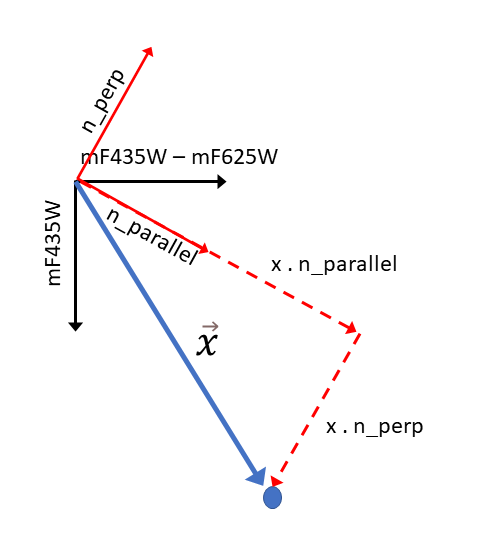

In [105]:
x0 = t["F435W"] - t["F625W"]
y0 = t["F435W"]

mask = (x0 > 0.9) & (x0 < 1.4) & (y0 > 20.5) & (y0 < 21.7)
x = x0[mask]
y = y0[mask]

# Calculate new vectors
vectors = np.array(list(zip(x,y)))

new_x = np.dot(vectors, n_par)
new_y = np.dot(vectors, n_per)

**e)**  Plot the projected positions. You should see a figure similar to the one you created above, but rotated to match the orientation of the vectors computed in part (c). [5 pts]

Text(0.5, 1.0, 'NGC 5139')

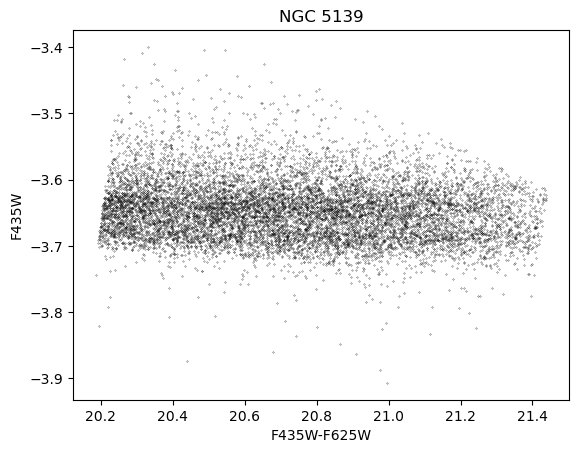

In [106]:
plt.scatter(x=new_x,y=new_y, s=0.05, c="k")
# plt.xlim(0.9, 1.4)
# plt.ylim(-5, 0)
# plt.text(01.12, 20, "MSa",fontdict={"color":"green", "family": "serif", "weight": "bold"})
# plt.text(01.11, 20.6, "rMS",fontdict={"color":"red", "family": "serif", "weight": "bold"})
# plt.text(01.075, 21, "bMS",fontdict={"color":"blue", "family": "serif", "weight": "bold"})
plt.xlabel("F435W-F625W")
plt.ylabel("F435W")
plt.title("NGC 5139")

**f)** Create a histogram plot of $\mathbf{x} \cdot {\hat{\mathbf n}}_\perp$ for the stars in the sample of part (d). Use a bin spacing of 0.005 magnitude. Label the plot appropriately.  You should see two local maxima in your histogram, each corresponding to one of the main sequences in the cluster. [8 pts]


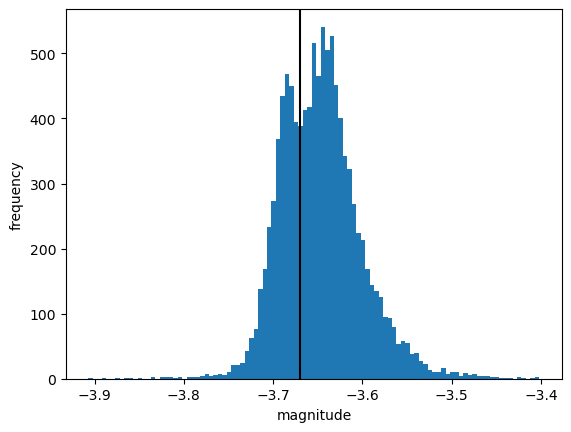

In [107]:
plt.hist(new_y, bins=np.arange(min(new_y), max(new_y), 0.005))
plt.xlabel("magnitude")
plt.ylabel("frequency")
plt.axvline(-3.67, c='k')

**g)** Estimate and report the distance in magnitudes between the peaks of the distribution.  There are many sophisticated algorithms for doing that task, but here we can do a simple version by slicing the histogram into two parts and finding the maximum of each part.
[8 pts]

In [108]:
abs(max(new_y[new_y < -3.67]) - max(new_y[new_y > -3.67]))


0.2703809334630085